<a href="https://colab.research.google.com/github/faddednatasha/Sky-Analytics/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('cleaned_flight_data.csv')
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_date,day,month,departure_time_numeric,arrival_time_numeric,duration_numeric
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2025-06-08,8,6,18,22,2.17
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2025-06-08,8,6,5,9,2.33
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2025-06-08,8,6,5,5,2.17
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2025-06-08,8,6,9,13,2.25
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2025-06-08,8,6,9,9,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2025-07-26,26,7,9,18,10.08
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2025-07-26,26,7,13,22,10.42
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2025-07-26,26,7,5,22,13.83
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2025-07-26,26,7,5,18,10.00


# **PRICE DISTRIBUTIONS**

**OVER PRICE DISTRIBUTION**

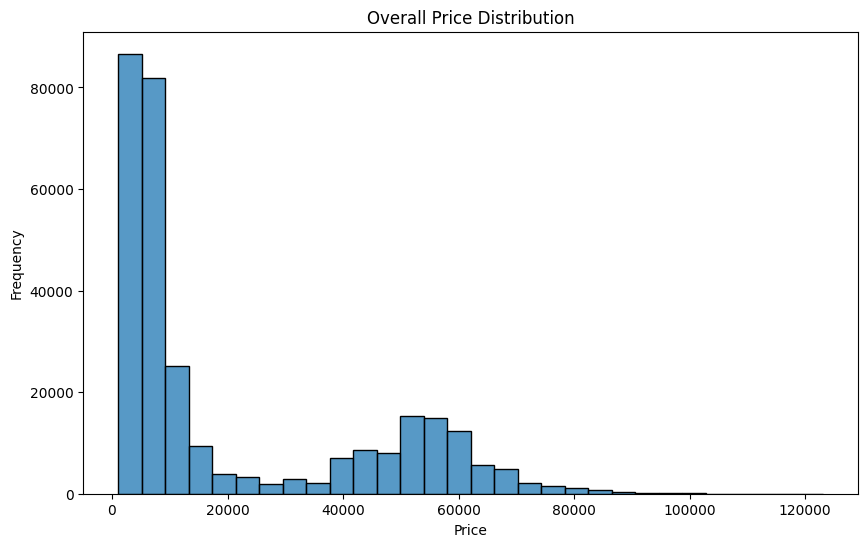

In [ ]:
# Plot overall price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30)
plt.title('Overall Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**SEGMENTED PRICE DISTRIBUTIONS**

**BY AIRLINE**

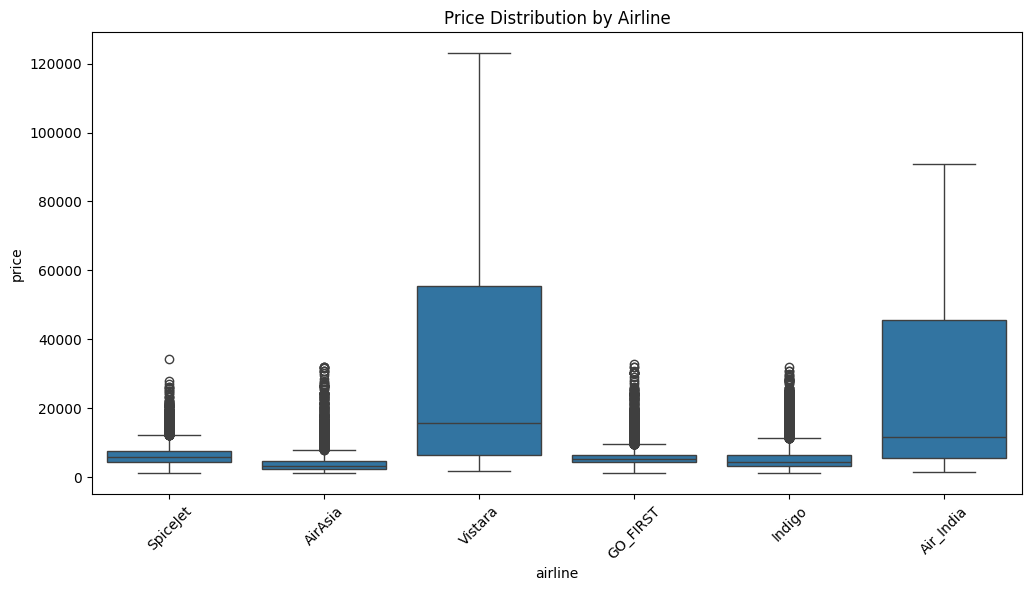

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=data)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.show()

**BY CLASS**

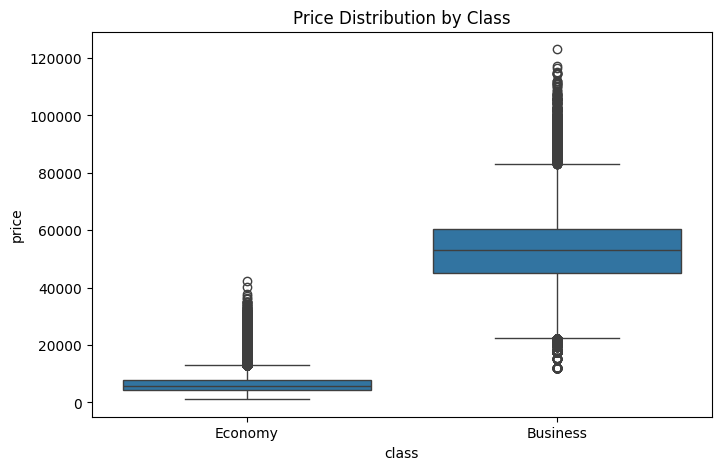

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='price', data=data)
plt.title('Price Distribution by Class')
plt.show()

**BY SOURCE**

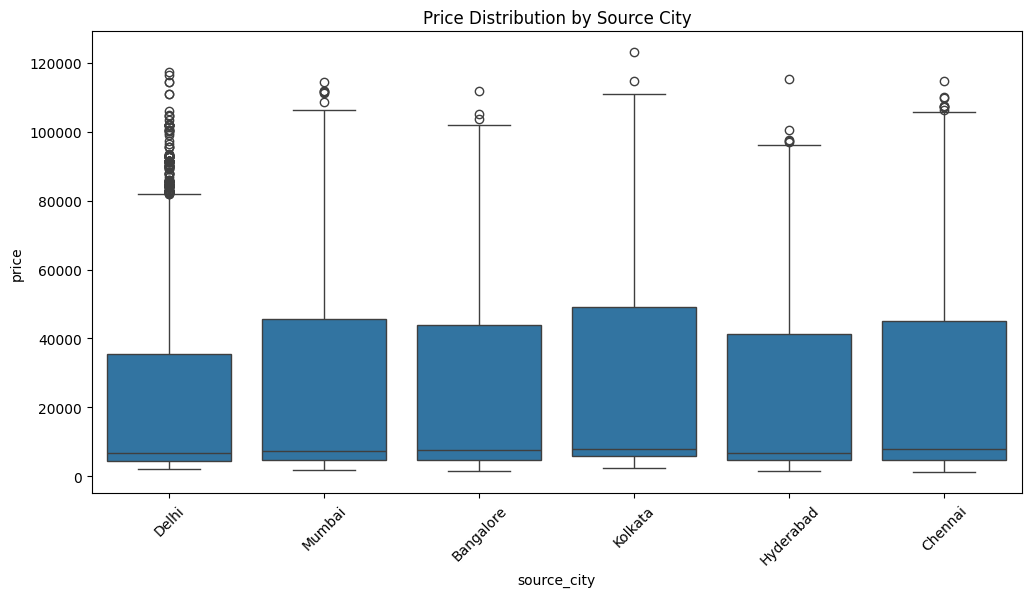

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=data)
plt.title('Price Distribution by Source City')
plt.xticks(rotation=45)
plt.show()


# **COMPARE PRICES BY NUMBER OF STOPS**

In [ ]:
stop_mapping = {'non-stop': 0, 'zero': 0, 'one': 1, 'two_or_more': 2}
data['stops_numeric'] = data['stops'].map(stop_mapping)

In [ ]:
print(data.groupby('stops_numeric')['price'].describe())

                  count          mean           std     min     25%     50%  \
stops_numeric                                                                 
0               36004.0   9375.938535  10623.008293  1105.0  2586.0  4499.0   
1              250863.0  22900.992482  23626.066584  1105.0  5136.0  7959.0   
2               13286.0  14113.450775  17664.332033  1966.0  6432.0  8307.0   

                   75%       max  
stops_numeric                     
0               8064.0   59573.0  
1              48851.0  123071.0  
2              13419.0  117307.0  


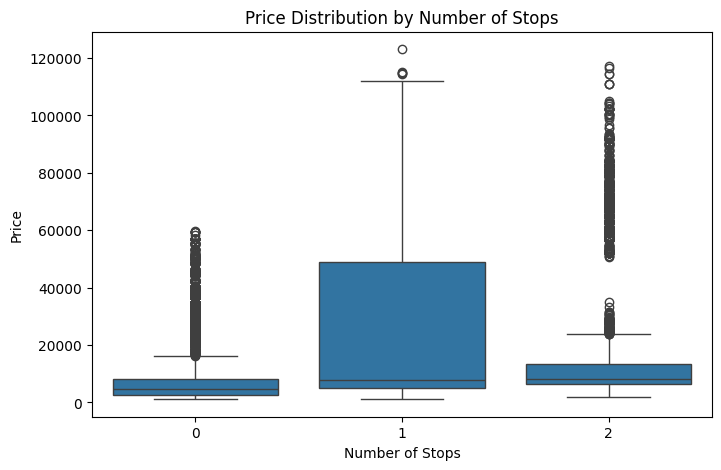

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stops_numeric', y='price', data=data)
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()


# **COMPARE PRICES BY ROUTE**

In [ ]:
data['route'] = data['source_city'] + ' → ' + data['destination_city']


In [ ]:
print(data.groupby('route')['price'].describe())

                         count          mean           std     min      25%  \
route                                                                         
Bangalore → Chennai     6410.0  23321.850078  22573.185689  1603.0  4792.00   
Bangalore → Delhi      13756.0  17723.313972  19746.484106  2723.0  4111.00   
Bangalore → Hyderabad   8928.0  21226.121192  21886.188883  1694.0  5322.00   
Bangalore → Kolkata    10028.0  23500.061229  24631.108723  3026.0  5178.00   
Bangalore → Mumbai     12939.0  23128.618672  25887.684502  2150.0  5177.00   
Chennai → Bangalore     6493.0  25081.850454  23405.422526  1443.0  4755.00   
Chennai → Delhi         9783.0  18981.863948  21946.879653  2051.0  4179.00   
Chennai → Hyderabad     6103.0  21591.345404  22866.927328  1105.0  4202.00   
Chennai → Kolkata       6983.0  22669.932407  23667.149966  2359.0  5095.00   
Chennai → Mumbai        9338.0  22765.849647  25118.401202  1830.0  4482.00   
Delhi → Bangalore      14012.0  17880.216315  19904.

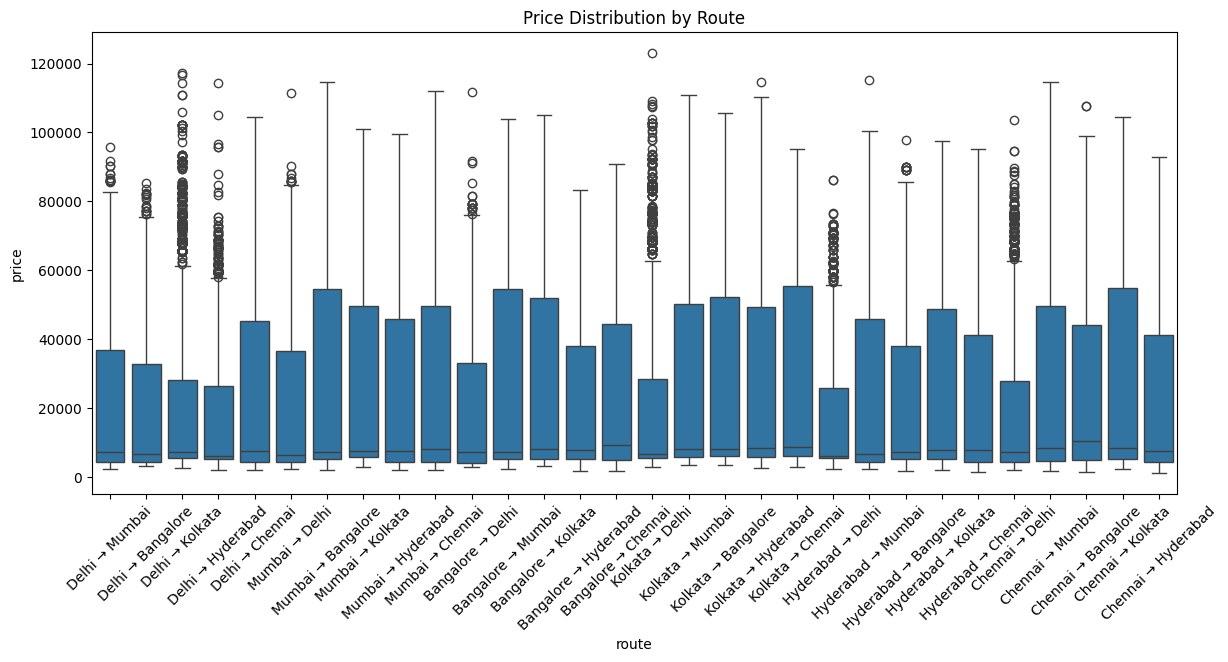

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='route', y='price', data=data)
plt.title('Price Distribution by Route')
plt.xticks(rotation=45)
plt.show()

# **OUTLIER DETECTION (IQR/Z-SCORE)**

In [ ]:
numeric_data=data.select_dtypes(include=np.number)
for col in numeric_data.columns:
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.5)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    LW = Q1-(1.5 * IQR)
    UW = Q3 + (1.5 * IQR)
    outliers = ((data[col] < LW) | (data[col] > UW))
    if outliers.sum()>0:
        print(f"\n{col} has:{outliers.sum()/len(data)*100:.2f}% Outliers")
    else:
        print(f"\n{col} Does Not Have Any Outliers")
    data.loc[(data[col] < LW) | (data[col] > UW), col] = Q2


duration has:0.70% Outliers

days_left Does Not Have Any Outliers

price has:0.04% Outliers

day Does Not Have Any Outliers

month Does Not Have Any Outliers

departure_time_numeric Does Not Have Any Outliers

arrival_time_numeric Does Not Have Any Outliers

duration_numeric has:0.70% Outliers

stops_numeric has:16.42% Outliers


In [ ]:
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Calculate z-scores for all numeric columns
data_zscores = data[numeric_cols].apply(zscore)

# Optionally, add these z-score columns back to the original DataFrame with a suffix
for col in data_zscores.columns:
    data[f'{col}_zscore'] = data_zscores[col]

# View the first few rows of z-score columns
print(data[[f"{col}_zscore" for col in numeric_cols]].head())

   duration_zscore  days_left_zscore  price_zscore  day_zscore  month_zscore  \
0        -1.420062         -1.843875     -0.658111   -1.078271     -1.121339   
1        -1.397105         -1.843875     -0.658111   -1.078271     -1.121339   
2        -1.420062         -1.843875     -0.657978   -1.078271     -1.121339   
3        -1.408583         -1.843875     -0.658023   -1.078271     -1.121339   
4        -1.397105         -1.843875     -0.658023   -1.078271     -1.121339   

   departure_time_numeric_zscore  arrival_time_numeric_zscore  \
0                       0.864859                     1.084890   
1                      -1.275900                    -1.016795   
2                      -1.275900                    -1.663468   
3                      -0.617205                    -0.370123   
4                      -0.617205                    -1.016795   

   duration_numeric_zscore  stops_numeric_zscore  
0                -1.420062                   NaN  
1                -1.397105

/usr/local/lib/python3.12/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


# **DURATION VS PRICE CORRELATION**

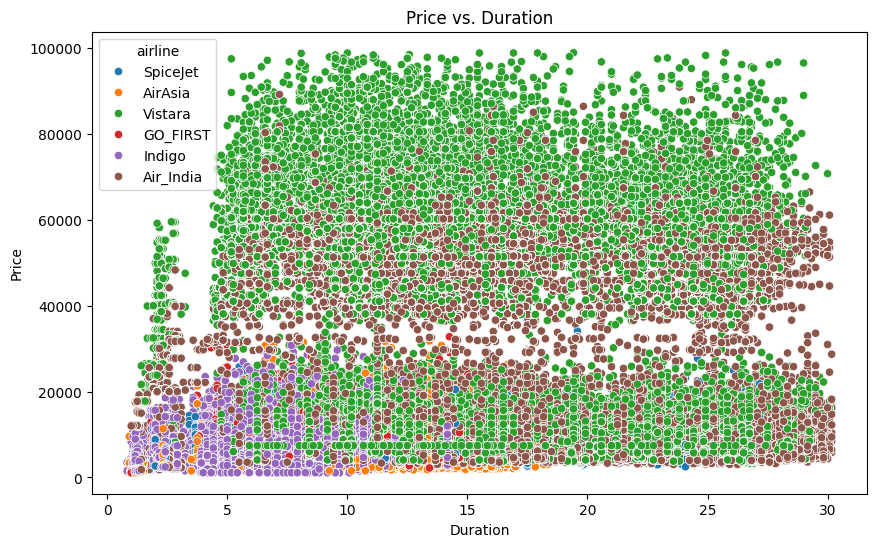

In [ ]:
# Scatter plot of price versus duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='duration', y='price', hue='airline')
plt.title('Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# **IMPACT OF DEPARTURE TIME ON PRICE**

In [ ]:
print(data.groupby('departure_time')['price'].describe())

                  count          mean           std     min     25%     50%  \
departure_time                                                                
Afternoon       47794.0  18167.199879  20907.521547  1105.0  4593.0  6663.0   
Early_Morning   66790.0  20337.308699  22301.615385  1105.0  4757.0  7212.0   
Evening         65102.0  21179.557356  23087.576020  1105.0  4593.0  7425.0   
Late_Night       1306.0   9295.299387  13680.515549  2050.0  3393.0  4499.0   
Morning         71146.0  21570.756093  22878.739165  1105.0  5208.0  8112.0   
Night           48015.0  23031.984192  23576.042139  1105.0  4731.0  7813.0   

                    75%      max  
departure_time                    
Afternoon       27976.0  98076.0  
Early_Morning   41281.0  98912.0  
Evening         42521.0  98919.0  
Late_Night       6459.5  56058.0  
Morning         43376.0  98904.0  
Night           49553.0  98972.0  


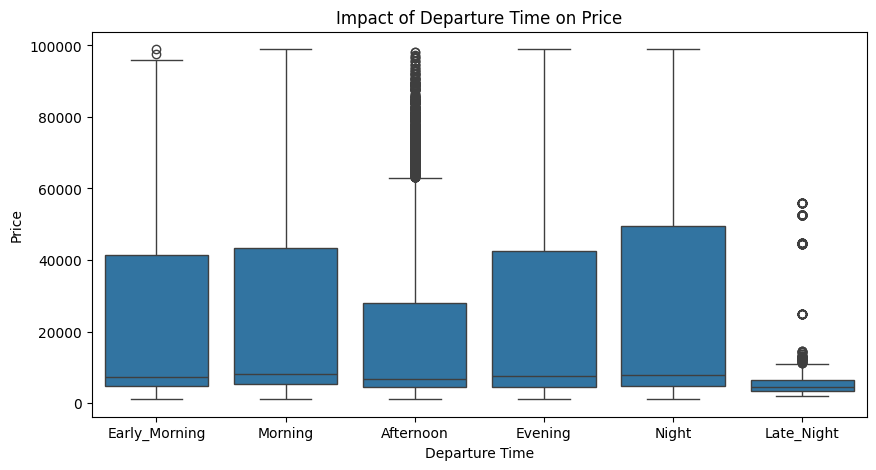

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='departure_time', y='price', data=data, order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.title('Impact of Departure Time on Price')
plt.ylabel('Price')
plt.xlabel('Departure Time')
plt.show()

# **BAR PLOT: AVERAGE PRICE BY DEPARTURE TIME**

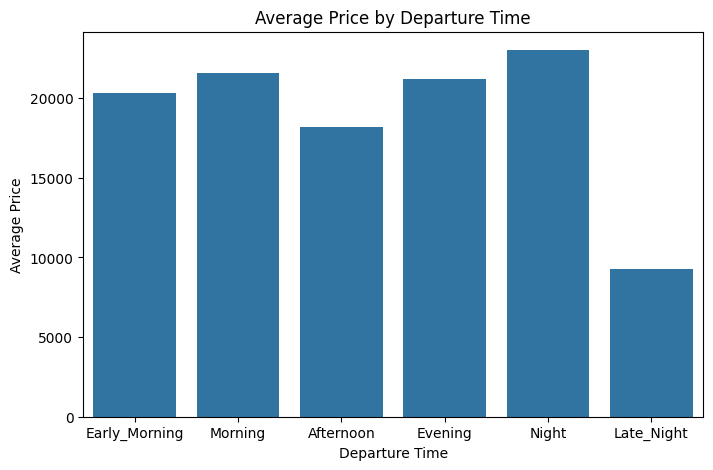

In [ ]:
avg_prices = data.groupby('departure_time')['price'].mean().reindex(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.title('Average Price by Departure Time')
plt.ylabel('Average Price')
plt.xlabel('Departure Time')
plt.show()

# **BAR/BOX/VIOLIN PLOTS ANDGROUP ANALYSIS**

**BAR PLOT: AVERAGE PRICE BY GROUP**

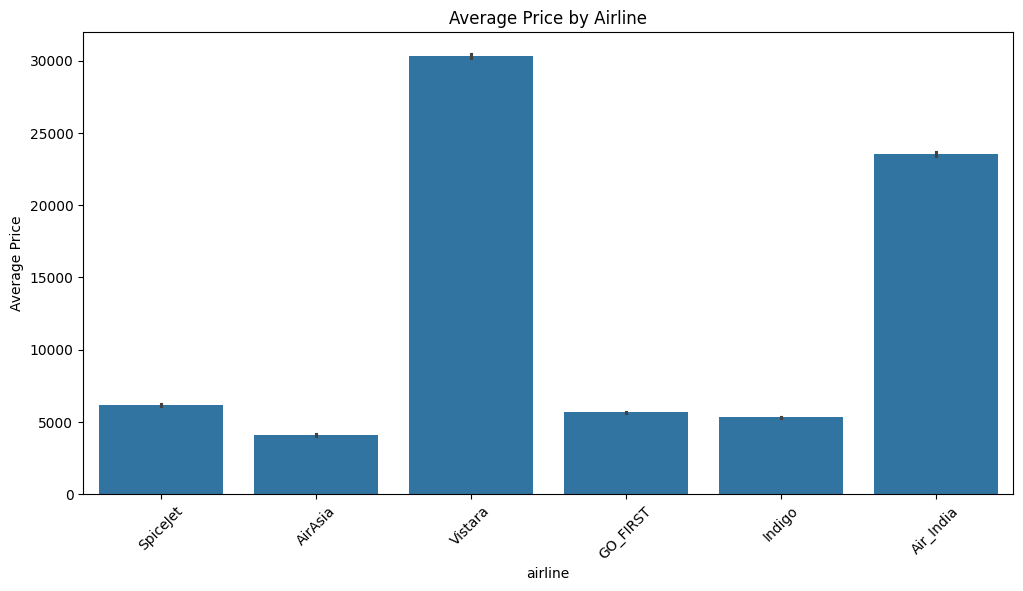

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=data, estimator='mean')
plt.title('Average Price by Airline')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()

**AIRLINE VS CLASS AVERAGE PRICE**

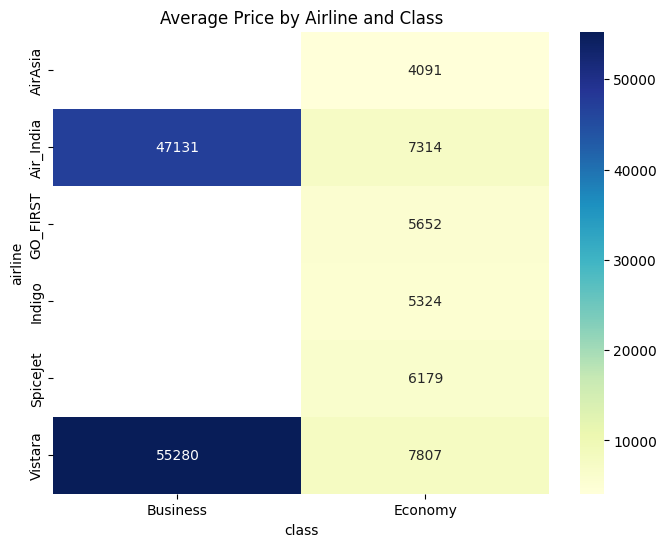

In [ ]:
pivot = data.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Price by Airline and Class')
plt.show()